## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [1]:
from keras.datasets import cifar10
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

C:\Users\10709151\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 讀取資料集並作前處理
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### 超參數

In [3]:
batch_size = 256 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 20 # 訓練整個資料集共 30個循環
results = {}

In [4]:
# 建立 ResNet 模型
def createmode():
    model = resnet(input_shape=(32,32,3))
    return model

In [5]:
firstmodel = createmode()
firstmodel.summary()

firstmodel.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = firstmodel.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


# Collect results
train_loss = firstmodel.history.history["loss"]
valid_loss = firstmodel.history.history["val_loss"]
train_acc = firstmodel.history.history["acc"]
valid_acc = firstmodel.history.history["val_acc"]

exp_name_tag = "First"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

score = firstmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 52s 1ms/step - loss: 2.0180 - acc: 0.4621 - val_loss: 2.3152 - val_acc: 0.3832
Epoch 2/20
50000/50000 [==============================] - 44s 874us/step - loss: 1.5346 - acc: 0.6153 - val_loss: 2.2904 - val_acc: 0.4015
Epoch 3/20
50000/50000 [==============================] - 44s 877us/step - loss: 1.2981 - acc: 0.6859 - val_loss: 1.6159 - val_acc: 0.5696
Epoch 4/20
50000/50000 [==============================] - 44s 882us/step - loss: 1.1365 - acc: 0.7388 - val_loss: 1.6085 - val_acc: 0.5929
Epoch 5/20
50000/50000 [==============================] - 44s 885us/step - loss: 1.0003 - acc: 0.7819 - val_loss: 1.6597 - val_acc: 0.6126
Epoch 6/20
50000/50000 [==============================] - 44s 885us/step - loss: 0.8972 - acc: 0.8154 - val_loss: 1.5725 - val_acc: 0.6227
Epoch 7/20
50000/50000 [==============================] - 44s 886us/step - loss: 0.8046 - acc: 0.8469 - val_loss: 1.81

### 導入 call back

In [6]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )

In [7]:
Secondmodel = createmode()
Secondmodel.summary()

Secondmodel.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = Secondmodel.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[earlystop])


# Collect results
train_loss = Secondmodel.history.history["loss"]
valid_loss = Secondmodel.history.history["val_loss"]
train_acc = Secondmodel.history.history["acc"]
valid_acc = Secondmodel.history.history["val_acc"]

exp_name_tag = "Second"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

score = Secondmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 32, 32, 16)   448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 32, 32, 16)   64          conv2d_32[0][0]                  
__________________________________________________________________________________________________
activation_29 (Activation)      (None, 32, 32, 16)   0           batch_normalization_29[0][0]     
__________________________________________________________________________________________________
conv2d_33 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 50s 1ms/step - loss: 1.9990 - acc: 0.4724 - val_loss: 1.9661 - val_acc: 0.4745
Epoch 2/20
50000/50000 [==============================] - 44s 883us/step - loss: 1.5078 - acc: 0.6227 - val_loss: 1.4868 - val_acc: 0.6214
Epoch 3/20
50000/50000 [==============================] - 44s 884us/step - loss: 1.2786 - acc: 0.6910 - val_loss: 1.7446 - val_acc: 0.5462
Epoch 4/20
50000/50000 [==============================] - 44s 882us/step - loss: 1.1246 - acc: 0.7392 - val_loss: 2.3946 - val_acc: 0.4808
Epoch 5/20
50000/50000 [==============================] - 44s 883us/step - loss: 0.9971 - acc: 0.7811 - val_loss: 1.3477 - val_acc: 0.6616
Epoch 6/20
50000/50000 [==============================] - 44s 883us/step - loss: 0.8874 - acc: 0.8166 - val_loss: 1.8448 - val_acc: 0.5694
Epoch 7/20
50000/50000 [==============================] - 44s 883us/step - loss: 0.7975 - acc: 0.8475 - val_loss: 1.68

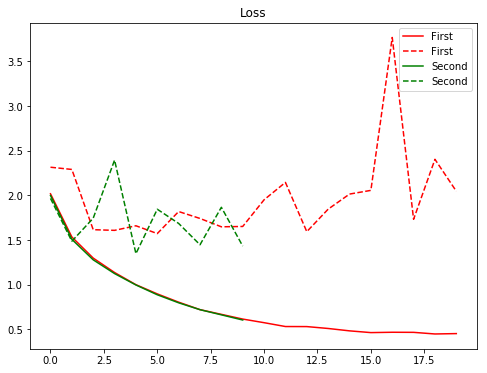

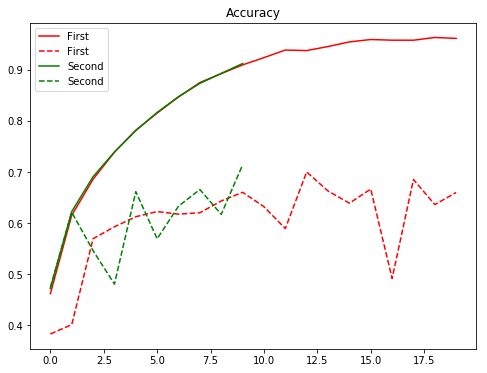

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 調整batch_size，再跑一次call back

In [9]:
batch_size = 64

In [10]:
Thirdmodel = createmode()
Thirdmodel.summary()

Thirdmodel.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = Thirdmodel.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[earlystop])


# Collect results
train_loss = Thirdmodel.history.history["loss"]
valid_loss = Thirdmodel.history.history["val_loss"]
train_acc = Thirdmodel.history.history["acc"]
valid_acc = Thirdmodel.history.history["val_acc"]

exp_name_tag = "Thirdmodel"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

score = Thirdmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 32, 32, 16)   448         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_57 (BatchNo (None, 32, 32, 16)   64          conv2d_63[0][0]                  
__________________________________________________________________________________________________
activation_57 (Activation)      (None, 32, 32, 16)   0           batch_normalization_57[0][0]     
__________________________________________________________________________________________________
conv2d_64 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 67s 1ms/step - loss: 1.8124 - acc: 0.5179 - val_loss: 1.8564 - val_acc: 0.5053
Epoch 2/20
50000/50000 [==============================] - 60s 1ms/step - loss: 1.3278 - acc: 0.6579 - val_loss: 1.4736 - val_acc: 0.6127
Epoch 3/20
50000/50000 [==============================] - 60s 1ms/step - loss: 1.1217 - acc: 0.7221 - val_loss: 1.3731 - val_acc: 0.6490
Epoch 4/20
50000/50000 [==============================] - 61s 1ms/step - loss: 0.9808 - acc: 0.7653 - val_loss: 1.7632 - val_acc: 0.5753
Epoch 5/20
50000/50000 [==============================] - 61s 1ms/step - loss: 0.8856 - acc: 0.7961 - val_loss: 1.1864 - val_acc: 0.6975
Epoch 6/20
50000/50000 [==============================] - 60s 1ms/step - loss: 0.8128 - acc: 0.8213 - val_loss: 1.2676 - val_acc: 0.6906
Epoch 7/20
50000/50000 [==============================] - 61s 1ms/step - loss: 0.7661 - acc: 0.8375 - val_loss: 1.0408 - val_acc

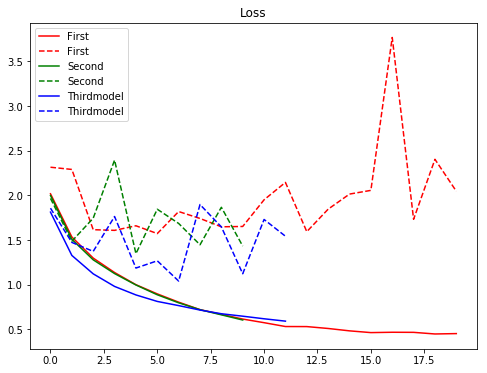

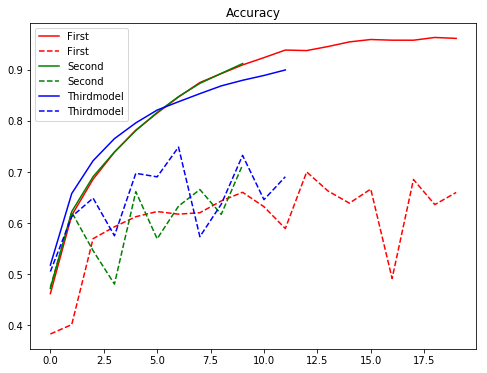

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 理論上調整 batch_size 下修應該可以有更好的準確性，但這邊看起來並沒有，可是跑的Epoch 變多了。接下來再以同樣模型修改Learning rate試試看是否可以提升準確性。

In [12]:
Fourthmodel = createmode()
Fourthmodel.summary()

Fourthmodel.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

history = Fourthmodel.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[earlystop])


# Collect results
train_loss = Fourthmodel.history.history["loss"]
valid_loss = Fourthmodel.history.history["val_loss"]
train_acc = Fourthmodel.history.history["acc"]
valid_acc = Fourthmodel.history.history["val_acc"]

exp_name_tag = "Fourthmodel"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

score = Fourthmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 32, 32, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 32, 32, 16)   64          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_85 (Activation)      (None, 32, 32, 16)   0           batch_normalization_85[0][0]     
__________________________________________________________________________________________________
conv2d_95 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 69s 1ms/step - loss: 2.8815 - acc: 0.1479 - val_loss: 2.6295 - val_acc: 0.2273
Epoch 2/20
50000/50000 [==============================] - 61s 1ms/step - loss: 2.5379 - acc: 0.2883 - val_loss: 2.4434 - val_acc: 0.3366
Epoch 3/20
50000/50000 [==============================] - 61s 1ms/step - loss: 2.4171 - acc: 0.3498 - val_loss: 2.3517 - val_acc: 0.3784
Epoch 4/20
50000/50000 [==============================] - 61s 1ms/step - loss: 2.3428 - acc: 0.3804 - val_loss: 2.2862 - val_acc: 0.4006
Epoch 5/20
50000/50000 [==============================] - 61s 1ms/step - loss: 2.2819 - acc: 0.4009 - val_loss: 2.2280 - val_acc: 0.4179
Epoch 6/20
50000/50000 [==============================] - 61s 1ms/step - loss: 2.2267 - acc: 0.4187 - val_loss: 2.1755 - val_acc: 0.4324
Epoch 7/20
50000/50000 [==============================] - 61s 1ms/step - loss: 2.1751 - acc: 0.4349 - val_loss: 2.1309 - val_acc

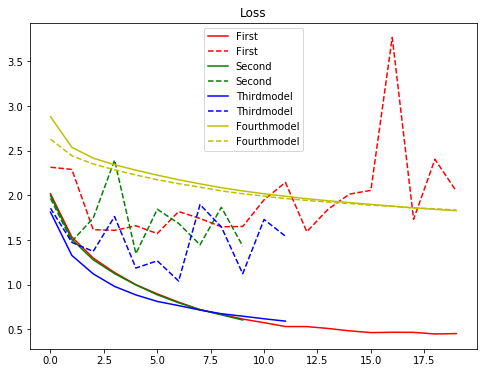

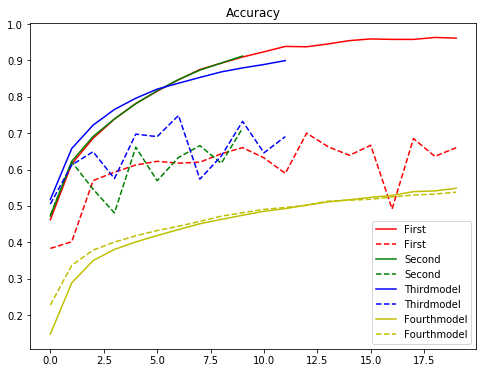

In [13]:
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### Learning rate 調整後可以避免overfitting現象，但準確度上不去。最後再調整Learning rate(變大) 及batch_size(恢復第一次測試設定)

In [14]:
batch_size = 256

In [15]:
Fifthmodel = createmode()
Fifthmodel.summary()

Fifthmodel.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

history = Fifthmodel.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[earlystop])


# Collect results
train_loss = Fifthmodel.history.history["loss"]
valid_loss = Fifthmodel.history.history["val_loss"]
train_acc = Fifthmodel.history.history["acc"]
valid_acc = Fifthmodel.history.history["val_acc"]

exp_name_tag = "Fifthmodel"
results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

score = Fifthmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_125 (Conv2D)             (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_113 (BatchN (None, 32, 32, 16)   64          conv2d_125[0][0]                 
__________________________________________________________________________________________________
activation_113 (Activation)     (None, 32, 32, 16)   0           batch_normalization_113[0][0]    
__________________________________________________________________________________________________
conv2d_126

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 54s 1ms/step - loss: 2.4750 - acc: 0.3227 - val_loss: 2.2748 - val_acc: 0.3829
Epoch 2/20
50000/50000 [==============================] - 45s 900us/step - loss: 2.1246 - acc: 0.4490 - val_loss: 2.0633 - val_acc: 0.4610
Epoch 3/20
50000/50000 [==============================] - 45s 901us/step - loss: 1.9305 - acc: 0.5126 - val_loss: 1.8991 - val_acc: 0.5173
Epoch 4/20
50000/50000 [==============================] - 45s 903us/step - loss: 1.8069 - acc: 0.5525 - val_loss: 1.8052 - val_acc: 0.5481
Epoch 5/20
50000/50000 [==============================] - 45s 905us/step - loss: 1.7133 - acc: 0.5830 - val_loss: 1.7739 - val_acc: 0.5563
Epoch 6/20
50000/50000 [==============================] - 45s 906us/step - loss: 1.6296 - acc: 0.6106 - val_loss: 1.7031 - val_acc: 0.5817
Epoch 7/20
50000/50000 [==============================] - 45s 904us/step - loss: 1.5563 - acc: 0.6371 - val_loss: 1.70

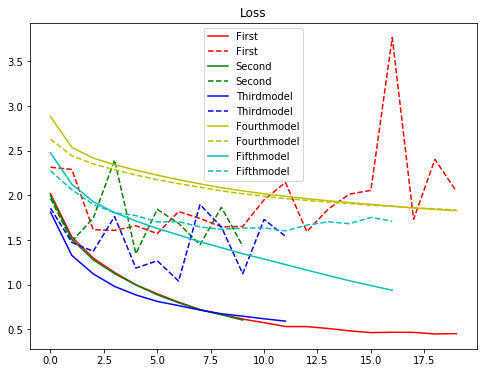

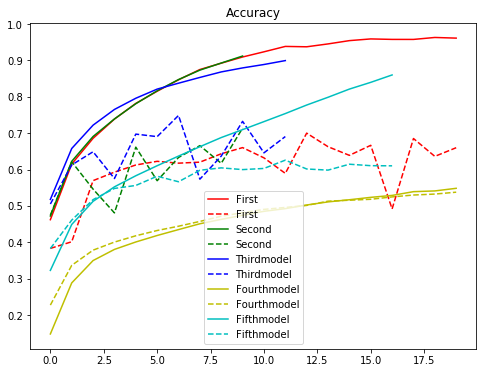

In [16]:
color_bar = ["r", "g", "b", "y", 'c']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### Overfitting